In [1]:
import torch
from example_models import MNIST_model, CIFAR_model, show_image, show_mei
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import sys
sys.path.append('..')

# Build and train your models

In [2]:
model = MNIST_model #CIFAR_model
load = False

model1 = model(name="model1", device=device, load=load)
model2 = model(name="model2", device=device, load=load)

if not load:
    model1.train(epochs=10)
    model2.train(epochs=10)
model1.eval()
model2.eval()
model1.save()
model2.save()

Epoch [1/10], Step [100/469], Loss: 1.8706 on model1
Epoch [1/10], Step [200/469], Loss: 1.6224 on model1
Epoch [1/10], Step [300/469], Loss: 1.5797 on model1
Epoch [1/10], Step [400/469], Loss: 1.5648 on model1
Epoch [2/10], Step [100/469], Loss: 1.5487 on model1
Epoch [2/10], Step [200/469], Loss: 1.5434 on model1
Epoch [2/10], Step [300/469], Loss: 1.5433 on model1
Epoch [2/10], Step [400/469], Loss: 1.5398 on model1
Epoch [3/10], Step [100/469], Loss: 1.5303 on model1
Epoch [3/10], Step [200/469], Loss: 1.5293 on model1
Epoch [3/10], Step [300/469], Loss: 1.5239 on model1
Epoch [3/10], Step [400/469], Loss: 1.5267 on model1
Epoch [4/10], Step [100/469], Loss: 1.5179 on model1
Epoch [4/10], Step [200/469], Loss: 1.5168 on model1
Epoch [4/10], Step [300/469], Loss: 1.5144 on model1
Epoch [4/10], Step [400/469], Loss: 1.5139 on model1
Epoch [5/10], Step [100/469], Loss: 1.5089 on model1
Epoch [5/10], Step [200/469], Loss: 1.5097 on model1
Epoch [5/10], Step [300/469], Loss: 1.5106 on 

# Import and instantiate MEI

In [6]:
import src.mei as mei
Mei = mei.MEI(models=[model1, model2])

# Generate *most exciting input*

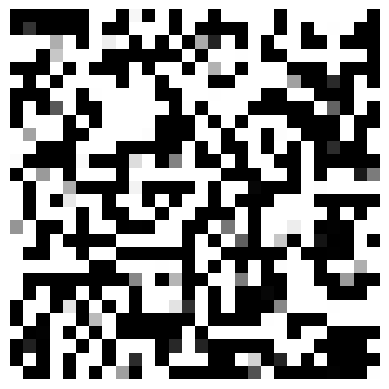

Activation:  0.40831816


In [4]:
meip = Mei.generate(0)
show_mei(meip)

# Generate gradient receptive field

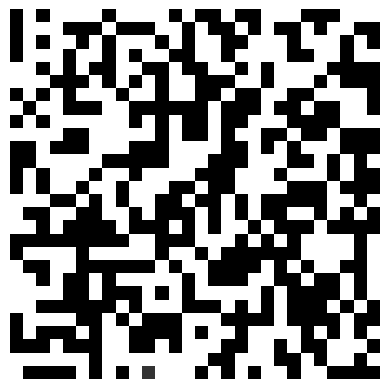

Activation:  0.19899


In [5]:
gradrf = Mei.gradient_rf(9)
show_mei(gradrf)

# Find most excitatory samples from dataset

100%|██████████| 60000/60000 [00:09<00:00, 6244.94it/s]


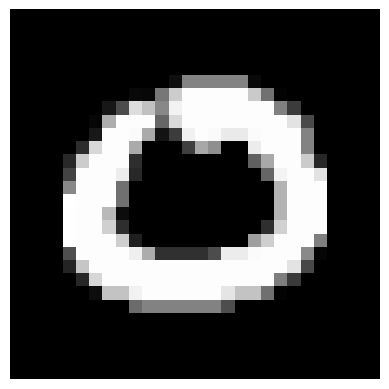

In [6]:
meip_best_match = meip.best_match(model1.train_loader)
show_image(meip_best_match[1][0][0])

# Compare original and *masked/jittered/shifted* responses

100%|██████████| 1/1 [00:00<00:00, 421.58it/s]

original response:  [0.38744405]
masked response:  [0.24579012]


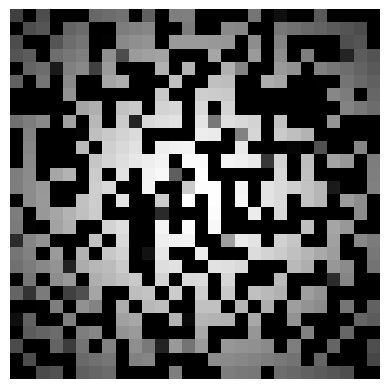

In [7]:
orig_resps, masked_resps, masked_images = meip.masked_responses()
print("original response: ", orig_resps)
print("masked response: ", masked_resps)
for i in masked_images:
    show_image(i)

# Create Gabor stimuli and find most excitatory ones

In [12]:
gabor = mei.Gabor(models=[model1, model2])
gabor.set_ranges(height=[28], width=[28])
best_gabor = gabor.best_gabor() #configban a grid search
show_mei(best_gabor)

Creating gabors


72800it [01:29, 813.52it/s]
0it [00:00, ?it/s]

torch.Size([28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 784x128)

# Find optimal Gabor stimuli

In [10]:
optimal_gabor = gabor.optimal_gabor()
show_mei(optimal_gabor)

  0%|          | 0/5 [00:00<?, ?it/s]


TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Compute spatial frequency

In [13]:
freq_cols_best_gabor, freq_rows_best_gabor, magnitude_spectrum_best_gabor = best_gabor.spatial_frequency()

freq_cols_optimal_gabor, freq_rows_optimal_gabor, magnitude_spectrum_optimal_gabor = optimal_gabor.spatial_frequency()

freq_cols_mei, freq_rows_mei, magnitude_spectrum_mei = meip.spatial_frequency()

NameError: name 'best_gabor' is not defined

# Dev tools

In [6]:
import importlib
importlib.reload(mei)

<module 'src.mei' from '/Users/laszlofreund/code/ai/mei/torch/mei/src/mei.py'>